# Descriptive Statistics

In [32]:
# Load the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
# from google.colab import files
# uploaded = files.upload()

In [34]:
# Load our data set

fd = pd.read_csv("Financial Dataset.csv")
# Lets preview it 
fd.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [35]:
# Lets review our last 5
fd.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [36]:
# Lets get the number of columns and rows
fd.shape

(23524, 13)

In [37]:
# Lets find out the column datatypes
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [38]:
# lets find unique elements in each column
fd.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [39]:
# Rename our columns
fd.rename(columns = {'Has a Bank account':'bank_account','Type of Location':'location','Cell Phone Access':'cell_phone','Respondent Age':'age',
                                    'The relathip with head':'relationship','Level of Educuation':'educuation_level','Type of Job':'job','gender_of_respondent':'gender'}, inplace = True)

fd.head()

,country,year,uniqueid,bank_account,location,cell_phone,household_size,age,gender,relationship,marital_status,educuation_level,job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [40]:
# Lets get the descriptive statistics 
fd.describe()

,year,household_size,age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [41]:
# Lets see if we have missing values in the columns
fd.isnull().sum()

country             14
year                 0
uniqueid             0
bank_account        36
location            15
cell_phone          11
household_size      28
age                 34
gender              34
relationship         4
marital_status      32
educuation_level    29
job                 30
dtype: int64

In [42]:
# Lets check for duplicated rows
fd.loc[fd.duplicated(), :]

,country,year,uniqueid,bank_account,location,cell_phone,household_size,age,gender,relationship,marital_status,educuation_level,job


The dataset had outliers in year which seemed erroneously fed. This was deleted howerver outliers found in household and age were not deleted because they seemed valid.

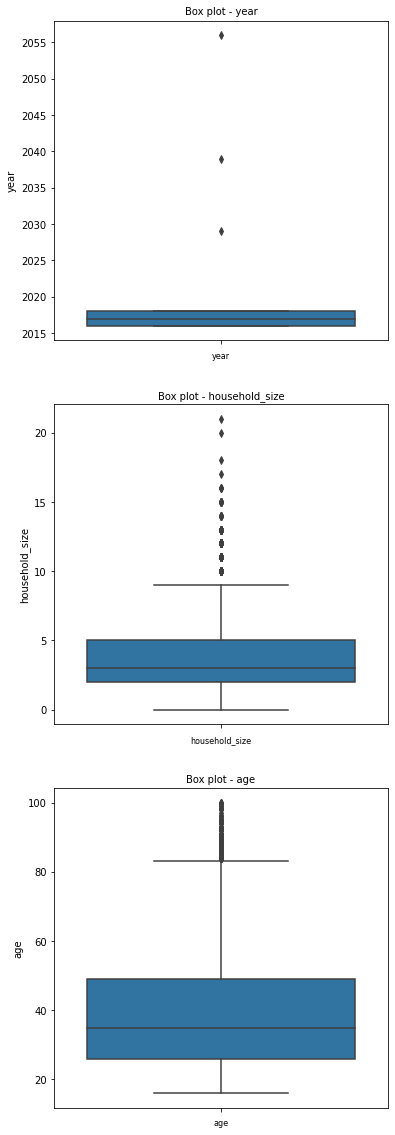

In [43]:
# Lets check for outlires in our data set
col_names = ['year','household_size', 'age']

fig, ax = plt.subplots(len(col_names), figsize=(6,20))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=fd[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [44]:
# identifying outlires in year 
Q1 = np.percentile(fd['year'], 25, interpolation= 'midpoint')

Q3 = np.percentile(fd['year'], 75, interpolation= 'midpoint')

IQR = Q3 - Q1

print("Old Shape: ", fd.shape)

# Upper bound
upper = np.where(fd['year'] >= (Q3+1.5*IQR))

# lower bound
lower = np.where(fd['year'] <=(Q1-1.5*IQR))
# Remove outlires
fd.drop(upper[0], inplace = True)
fd.drop(lower[0], inplace = True)

print("New shape: ", fd.shape)

Old Shape:  (23524, 13)
New shape:  (23521, 13)


Below histograms show us the count in age, year and household size. Large households have few counts including people with old age.

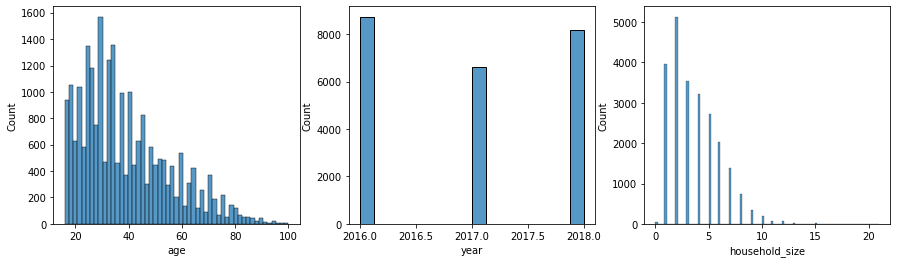

In [45]:
# Lets get some histograms. 
ages, axs = plt.subplots(ncols = 3, figsize=(15, 4))

sns.histplot(fd.age.dropna(), kde=False, ax=axs[0])
year_plt = sns.histplot(fd.year, kde=False, ax=axs[1])
house_plt = sns.histplot(fd.household_size.dropna(), kde=False, ax=axs[2])

In [46]:
fd = fd.dropna(how='any', axis=0)

There is no relationship with how big the household is in relation to having a bank account. People with no formal education and secondary education dont show signs of owning bank accounts.

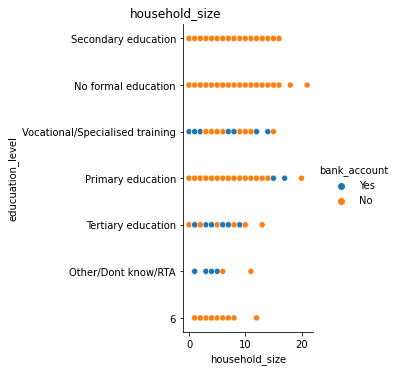

In [47]:
col = 'household_size'
sns.relplot(x=col, y='educuation_level',hue='bank_account', data=fd)
_ = plt.suptitle(col, y=1.02)

.

1.   We can see an increase in bank accounts in 2018 compared to other years
2.   Household size grows in size but the ownership of bank decreases.Smaller families seem to have high level of awareness to bank access and more have them.




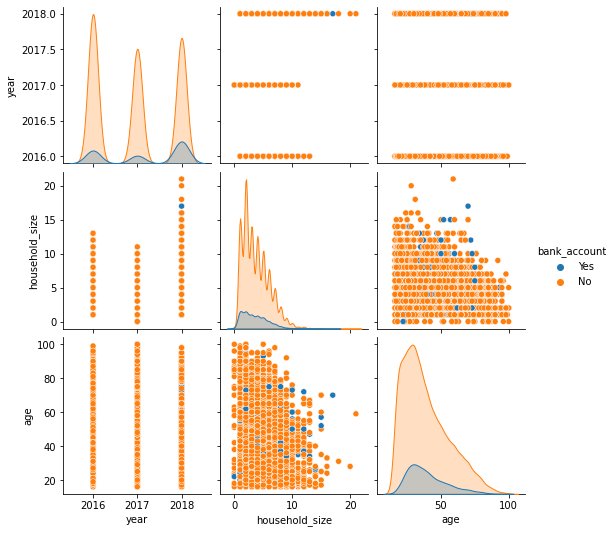

In [48]:
sns.pairplot(fd, hue='bank_account')

The plot shows us that age and household_size are weakly correlated hence we will consider them while creating our model

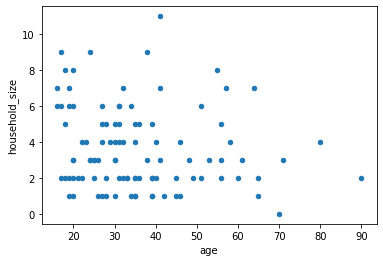

In [49]:
# Bivariate analysis
fd[fd['age'] > 15].sample(100).plot.scatter(x='age', y='household_size')
plt.show()

In this dataset, we don’t see any attributes to be correlated and the diagonal elements of the matrix value are always 1 as we are finding the correlation between the same columns thus the inference here is that all the numerical attributes are important and needs to be considered for building the model.

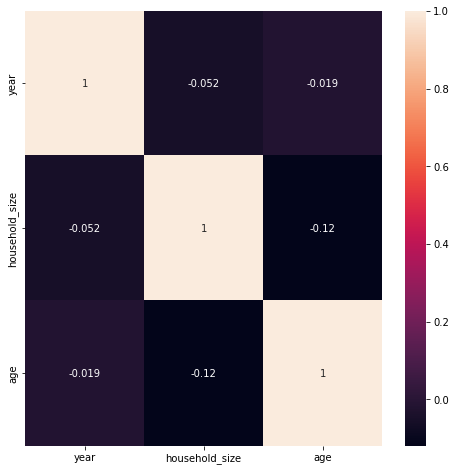

In [50]:
plt.figure(figsize=(8, 8))

fd_corr = fd.corr()
sns.heatmap(fd_corr, 
            xticklabels = fd_corr.columns.values,
            yticklabels = fd_corr.columns.values,
            annot = True);

There is a high number of rural population compared to urban population.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


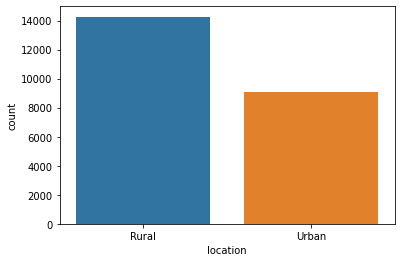

In [51]:
sns.countplot(fd.location)
plt.show()

In [57]:
# Lets change the datatypes of some of our columns
fd = fd.astype({"country":'category',"bank_account":'category'})
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   country           23340 non-null  category
 1   year              23340 non-null  int64   
 2   uniqueid          23340 non-null  object  
 3   bank_account      23340 non-null  category
 4   location          23340 non-null  category
 5   cell_phone        23340 non-null  category
 6   household_size    23340 non-null  float64 
 7   age               23340 non-null  float64 
 8   gender            23340 non-null  category
 9   relationship      23340 non-null  category
 10  marital_status    23340 non-null  category
 11  educuation_level  23340 non-null  category
 12  job               23340 non-null  category
dtypes: category(9), float64(2), int64(1), object(1)
memory usage: 1.6+ MB


The random forest algorithm is able to predict 4036 out of 4668 instances, resulting in 86% accuracy

In [56]:
# PCA
# We devide the data set into a feature set and corresponding labels
features = ['household_size','age']

x = fd.loc[:, features].values
y = fd.loc[:,['bank_account']].values

# we split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state = 0)

# Normalizing the data
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# We perform PCA and we want our explained variance to be between 95% to 99%
pca = PCA(n_components= 0.95)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# Train and make prediction using random forest classification
classifier = RandomForestClassifier(max_depth = 2, random_state= 0)
classifier.fit(x_train, y_train)

# predicting the test set results
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[[4036    0]
 [ 632    0]]
0.8646101113967438
